## Machine Learning Model: Age my Abalone, Please.

By Christopher Lacenere 

I wrote a machine learning model that attempts to predict the age of an [abalone](https://en.wikipedia.org/wiki/Abalone) (a marine snail) based on various variables, such as length, diameter, height, whole weight, shucked weight, viscera weight, and shell weight.  My algorithm is called "Age my abalone, please." and you can find the Jupyter notebook containing this algorithm [here](http://www.codingthelaw.org/Fall_2017/work/c0ding7h314w/p3/abalone.ipynb).  To write my machine learning model, we used a Jupyter notebook with Python code supplied by Professor Colarusso.

As a first step, I had to find a set of data to use in my model.  I obtained my data set from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php).  I chose to use the repository's [Abalone Data Set](http://archive.ics.uci.edu/ml/index.php).  From the website:

"The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age."

The other measurements, of which the data set was comprised, are shown below.  The goal of this project is to predict the age of an abalone (the number of rings +1.5 in years) based on physical measurements such as length, diameter, height, whole weight, shucked weight, viscera weight, and shell weight.  I chose not to use sex in my model because I felt that the age of an abalone, based on sex, had too much variability.  For example, a female abalone could be 4 to 30 years old.

Name / Data Type / Measurement Unit / Description 

Sex / nominal / -- / M, F, and I (infant) 

Length / continuous / mm / Longest shell measurement 

Diameter	/ continuous / mm / perpendicular to length 

Height / continuous / mm / with meat in shell 

Whole weight / continuous / grams / whole abalone 

Shucked weight / continuous	/ grams / weight of meat 

Viscera weight / continuous / grams / gut weight (after bleeding) 

Shell weight / continuous / grams / after being dried 

Rings / integer / -- / +1.5 gives the age in years 

The original dataset downloaded from the UCI Repository can be found in my p3 folder as "abalone.data.xlsx."  This data set has physical measurements for over 4,000 abalone.

I did an initial cleaning of my data set using Excel by removing the "Sex" column and replacing the number of rings column with a new column called "Age" (rings + 1.5).  I then saved this as a csv file, "abalone.csv," which can be found in my p3 folder.  Further cleaning of this data was performed in Python to remove non-numeric values and replace them with NaN (not a number).

I then ran linear regressions of age (y-axis) vs. length, diameter, height, whole weight, shucked weight, viscera weight, and shell weight (x-axes), individually.  The combined R-squared value of my model using all of these parameters was rather poor (0.529), as was the accuracy (0.511).  I then thought the model might be more accurate if I limited the analysis to a single sex, and ran the model just on male abalone.  To my surprise, the results were even less predictictive, with an R-squaed of 0.440 and an accuracy of 0.405.  I suspect that additional parameters are needed in order to crack this "abalone age problem."  as stated on the UCI Machine Learning Repository website, "Further information, such as weather patterns and location (hence food availability) may be required to solve the problem."

I found the project to be fairly straight-forward.  I did run into a few problems that were solved relatively quickly.  At first, my data frame was giving me troubles because there were non-numeric values in the data frame.  This was resolved by running Professor Colarusso's module to clean the data set to remove non-numeric values and replace them with NaN.  I also ran into trouble at first using the default code, which set the top value for the y-axis to be <=10.  For my dataset, I ran the module to look at the the unique abalone age values and found that my maximum age value was 30.5.  I thus reset the max y-axis value to be >=30.5 and my graphs looked much better (i.e., more linear than second order because the top values were not clipped).



## Load Some Stuff

This is where we load libraires and the like so we can do what we need. If you get an error saying a module is not loaded, open a new terminal/cmd line and try running: `pip install [module name]`. 

In [1]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning

Here we load the data we collected and get it all ready to feed to our statistical model(s). That is, we are trying to make a table with one **target** column and one or more **features**. Here I'm loading happiness.csv from: https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-responses-2011-2013-20/w898-3dfm Note: you can find information on the data elements at this link. 


In [2]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv('abalone.csv', parse_dates=[0]) 
raw_data_df.head()

,Age,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,16.5,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,8.5,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,10.5,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,11.5,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,8.5,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [3]:
# To make sure all of your columns are stored as numbers, use the pd.to_numeric method like so.
raw_data_df = raw_data_df.apply(pd.to_numeric, errors='coerce')
# errors='coerce' will set things that can't be converted to numbers to NaN
# so you'll want to drop these like so.
raw_data_df = raw_data_df.dropna()
raw_data_df.head()

,Age,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,16.5,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,8.5,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,10.5,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,11.5,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,8.5,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


## Taining and Validation

Above I created one dataset worth exploring: 
- **`raw_data_df`**. The data needed to access *happiness* along a continuous variable.

## raw_data_df



In [4]:
data = raw_data_df

data = data[data["Age"]<=30.5]

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

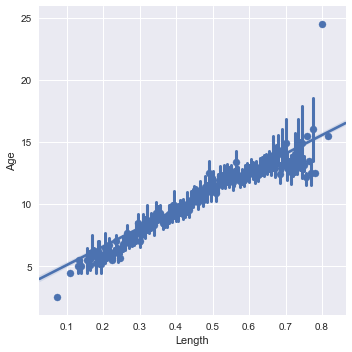

In [5]:
sns.lmplot(x="Length", y="Age", data=training, x_estimator=np.mean, order=1)

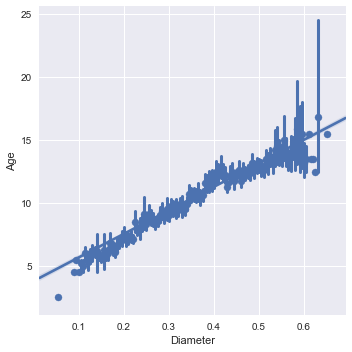

In [6]:
sns.lmplot(x="Diameter", y="Age", data=training, x_estimator=np.mean, order=1)

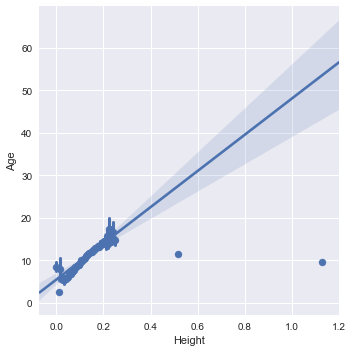

In [8]:
sns.lmplot(x="Height", y="Age", data=training, x_estimator=np.mean, order=1)

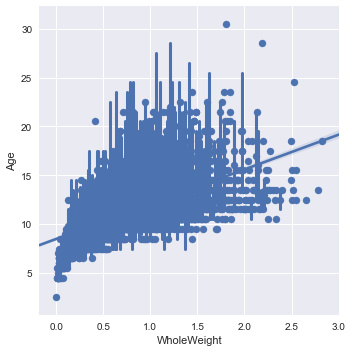

In [9]:
sns.lmplot(x="WholeWeight", y="Age", data=training, x_estimator=np.mean, order=1)

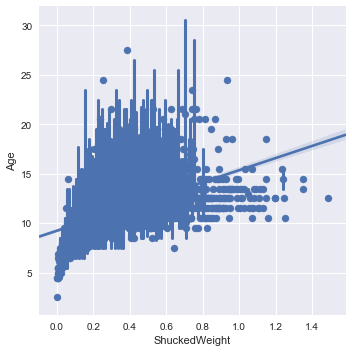

In [10]:
sns.lmplot(x="ShuckedWeight", y="Age", data=training, x_estimator=np.mean, order=1)

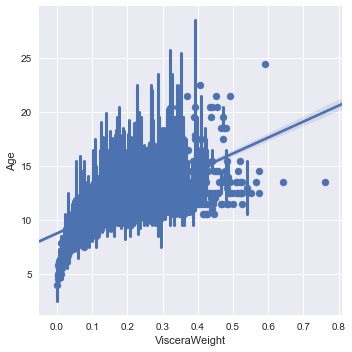

In [11]:
sns.lmplot(x="VisceraWeight", y="Age", data=training, x_estimator=np.mean, order=1)

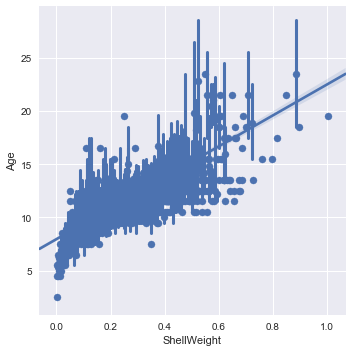

In [12]:
sns.lmplot(x="ShellWeight", y="Age", data=training, x_estimator=np.mean, order=1)

In [13]:
model = ols("Age ~ Length + Diameter + Height + WholeWeight + ShuckedWeight + VisceraWeight + ShellWeight", training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     634.2
Date:                Mon, 04 Dec 2017   Prob (F-statistic):               0.00
Time:                        14:36:46   Log-Likelihood:                -8771.1
No. Observations:                3968   AIC:                         1.756e+04
Df Residuals:                    3960   BIC:                         1.761e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4806      0.274     16.340      0.000       3.943       5.018
Length           -1.8813      1.866     -1.008      0.313      -5.540       1.777
Diameter         13.9348      2.296      6.069      0.000       9.433      18.436
Height           11.4448      1.560      7.338      0.000       8.387      14.503
WholeWeight       9.4667      0.751     12.603      0.000       7.994      10.939
ShuckedWeight   -20.4163      0.844    -24.195      0.000     -22.071     -18.762
VisceraWeight    -9.8516      1.337     -7.370      0.000     -12.472      -7.231
ShellWeight       8.0896      1.159      6.980      0.000       5.817      10.362
==============================================================================
Omnibus:                      860.943   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2334.899
Skew:                           1.150   Prob(JB):                         0.00
Kurtosis:                       5.972   Cond. No.                         132.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("Age", axis=1).as_matrix(columns=None)
labels_train = training["Age"].as_matrix(columns=None)

features_test = holdout.drop("Age", axis=1).as_matrix(columns=None)
labels_test = holdout["Age"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.528546013065
Accuracy: 0.511443291627
